In [1]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error ,mean_squared_error, median_absolute_error,confusion_matrix,accuracy_score,r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('profiles.csv')
us_states = pd.read_csv('cal_cities_lat_long.csv')
df.head()

age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially        NaN   
3   23            thin         vegetarian  socially        NaN   
4   29        athletic                NaN  socially      never   

                           education  \
0      working on college/university   
1              working on space camp   
2     graduated from masters program   
3      working on college/university   
4  graduated from college/university   

                                              essay0  \
0  about me:<br />\n<br />\ni would love to think...   
1  i am a chef: this is what that means.<br />\n1...   
2  i'm not ashamed of much, but writing public te...   
3          i work in a library and go to school. . .   
4  hey how's it going? currently vague on the pro...   

                                              essay1  \
0  currently working as an international agent fo...   
1  dedicating everyday to being an unbelievable b...   
2  i make nerdy software for musicians, artists, ...   
3          reading things written by old dead people   
4                         work work work work + play   

                                              essay2  \
0  making people laugh.<br />\nranting about a go...   
1  being silly. having ridiculous amonts of fun w...   
2  improvising in different contexts. alternating...   
3  playing synthesizers and organizing books acco...   
4  creating imagery to look at:<br />\nhttp://bag...   

                                              essay3  ...  \
0  the way i look. i am a six foot half asian, ha...  ...   
1                                                NaN  ...   
2  my large jaw and large glasses are the physica...  ...   
3                  socially awkward but i do my best  ...   
4            i smile a lot and my inquisitive nature  ...   

                          location  \
0  south san francisco, california   
1              oakland, california   
2        san francisco, california   
3             berkeley, california   
4        san francisco, california   

                                      offspring orientation  \
0  doesn&rsquo;t have kids, but might want them    straight   
1  doesn&rsquo;t have kids, but might want them    straight   
2                                           NaN    straight   
3                       doesn&rsquo;t want kids    straight   
4                                           NaN    straight   

                        pets                                  religion sex  \
0  likes dogs and likes cats     agnosticism and very serious about it   m   
1  likes dogs and likes cats  agnosticism but not too serious about it   m   
2                   has cats                                       NaN   m   
3                 likes cats                                       NaN   m   
4  likes dogs and likes cats                                       NaN   m   

                                 sign     smokes  \
0                              gemini  sometimes   
1                              cancer         no   
2  pisces but it doesn&rsquo;t matter         no   
3                              pisces         no   
4                            aquarius         no   

                                              speaks     status  
0                                            english     single  
1  english (fluently), spanish (poorly), french (...     single  
2                               english, french, c++  available  
3                           english, german (poorly)     single  
4                                            english     single  

[5 rows x 31 columns]

In [3]:
df.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')

In [4]:
df = df.drop(columns = ['essay1','essay2','essay3','essay0','essay4','essay5','essay6','essay7','essay8','essay9'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   ethnicity    54266 non-null  object 
 7   height       59943 non-null  float64
 8   income       59946 non-null  int64  
 9   job          51748 non-null  object 
 10  last_online  59946 non-null  object 
 11  location     59946 non-null  object 
 12  offspring    24385 non-null  object 
 13  orientation  59946 non-null  object 
 14  pets         40025 non-null  object 
 15  religion     39720 non-null  object 
 16  sex          59946 non-null  object 
 17  sign         48890 non-null  object 
 18  smokes       54434 non-null  object 
 19  spea

In [6]:
df.isna().sum()

age                0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
orientation        0
pets           19921
religion       20226
sex                0
sign           11056
smokes          5512
speaks            50
status             0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   ethnicity    54266 non-null  object 
 7   height       59943 non-null  float64
 8   income       59946 non-null  int64  
 9   job          51748 non-null  object 
 10  last_online  59946 non-null  object 
 11  location     59946 non-null  object 
 12  offspring    24385 non-null  object 
 13  orientation  59946 non-null  object 
 14  pets         40025 non-null  object 
 15  religion     39720 non-null  object 
 16  sex          59946 non-null  object 
 17  sign         48890 non-null  object 
 18  smokes       54434 non-null  object 
 19  spea

In [8]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print(df[i].value_counts())
    print("-"*100)


age
[ 22  35  38  23  29  32  31  24  37  28  30  39  33  26  27  20  25  40
  36  21  34  43  46  41  42  45  18  55  50  59  44  48  54  51  62  52
  19  58  66  53  63  47  49  61  60  57  56  65  64  68 110  69  67 109]
26     3724
27     3685
28     3583
25     3531
29     3295
24     3242
30     3149
31     2735
23     2592
32     2587
33     2206
22     1934
34     1902
35     1755
36     1583
37     1427
38     1330
21     1282
39     1172
42     1072
40     1030
41      980
20      953
43      858
44      708
45      643
19      611
46      578
47      529
48      481
49      459
50      437
51      350
52      344
18      309
56      271
54      267
55      265
57      256
53      252
59      221
58      197
60      195
61      176
62      167
63      138
64      113
65      109
66      105
67       66
68       59
69       31
110       1
109       1
Name: age, dtype: int64
----------------------------------------------------------------------------------------------------
bod

# First we need to change some of the columns to achieve sustainable data. 
### So in order we delete the outlier ages like 110-109
### Round up the diets such as anything vegetarian halal kosher etc.
### Change education such as we add dropped out phd programs to graduated master degrees etc.
### Change ethnicity column as their first choice
### Change height column as deleting outliers such as 95 inches (245 cm !!) and 1 inches heights
### Change income variables because lots of the users do not give any value. So in future we might delete that column because of trust of that values.
### We do not need last online column so for now keep as it is.
### If california is nearly the all locations we can just take california and make it special like neighborhoods of california
### We can change pets column as two column like like dogs like cats as 1/0 representation.
### Religion column as taking their first name
### Same thing goes for the signs
### We may divide the columns as poorly okay fluently (might change my idea in future :D)
### ALSO WE HAVE LOTS OF NA/NULL VALUES SO ONE OF THE FEATURES WE WILL ADD THOSE SUCH AS FOR DIET WE WILL AD NA VALUES AS ANYTHING

In [9]:
#Change age outliers
Q1 = df["age"].quantile(0.25)
Q3 = df["age"].quantile(0.75)

IQR = Q3 - Q1

cut_off = IQR * 1.5 #Yukaridaki aciklamada bahsettigimiz IQR * 1.5 degeri ayni zamanda cut_off degeri olarak da bahsedilebilir.

lower_outlier = Q1 - cut_off
upper_outlier = Q3 + cut_off

print('The IQR is',IQR)
print('The lower outlier values starts from', lower_outlier)
print('The upper outlier values starts from', upper_outlier)

df_lower = df[df['age'] < lower_outlier]
df_upper = df[df['age'] > upper_outlier]
print(df_lower.shape[0])
print(df_upper.shape[0])

The IQR is 11.0
The lower outlier values starts from 9.5
The upper outlier values starts from 53.5
0
2638


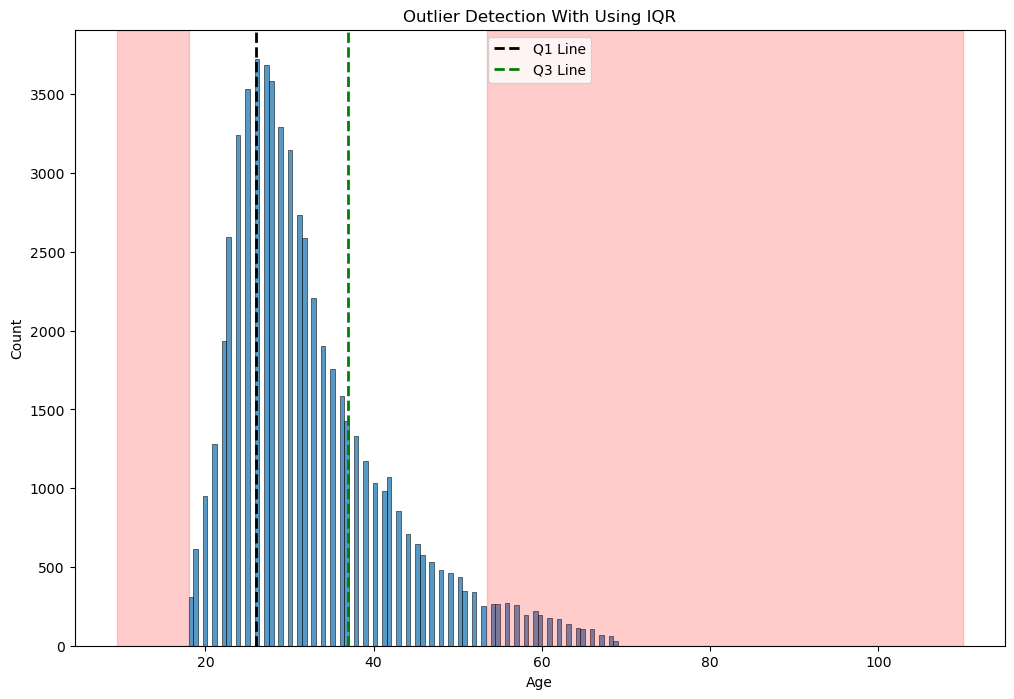

In [10]:
plt.figure(figsize = (12,8))
plt.title('Outlier Detection With Using IQR')
plt.xlabel('Age')
plt.ylabel('Count')
sns.histplot(df.age, kde=False)
plt.axvline(x = Q1, color = 'black', label = 'Q1 Line',linestyle = '--',linewidth = 2)
plt.axvline(x = Q3, color = 'green', label = 'Q3 Line',linestyle = '--',linewidth = 2)
plt.legend()
plt.axvspan(xmin = lower_outlier,xmax= df.age.min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper_outlier,xmax= df.age.max(),alpha=0.2, color='red')

Now lets look with using STD too and choose to cut from where.

In [11]:
mean_val = df.age.mean()
std_val = df.age.std()

cutoff = std_val * 3 #third std value in other names

lower_std = mean_val - cutoff
upper_std = mean_val + cutoff

print('Lower last non-outlier value is ' , lower_std)
print('Upper last non-outlier value is ', upper_std)

df_lower_std = df[df['age'] < lower_std]
df_upper_std = df[df['age'] > upper_std]
print('Total number of outliers: ', (df_lower_std.shape[0]+df_upper_std.shape[0]))

Lower last non-outlier value is  3.981952303054232
Upper last non-outlier value is  60.69862688488158
Total number of outliers:  966


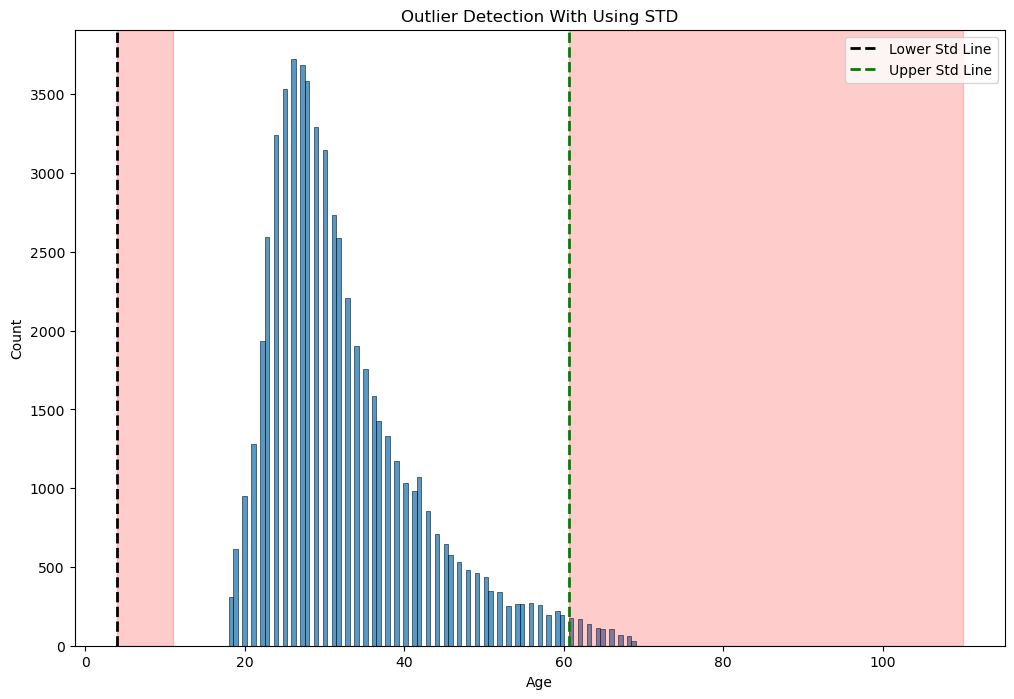

In [12]:
plt.figure(figsize = (12,8))
plt.title('Outlier Detection With Using STD')
plt.xlabel('Age')
plt.ylabel('Count')
sns.histplot(df.age, kde=False)
plt.axvline(x = lower_std, color = 'black', label = 'Lower Std Line',linestyle = '--',linewidth = 2)
plt.axvline(x = upper_std, color = 'green', label = 'Upper Std Line',linestyle = '--',linewidth = 2)
plt.legend()
plt.axvspan(xmin = lower_std,xmax= df.age.min()-7,alpha=0.2, color='red')
plt.axvspan(xmin = upper_std,xmax= df.age.max(),alpha=0.2, color='red')

Wıth using STD we see as age 60 is starting point for our outliers also with lower total value. So it would be more appropirate to use that.

32.0652528548124
30.0


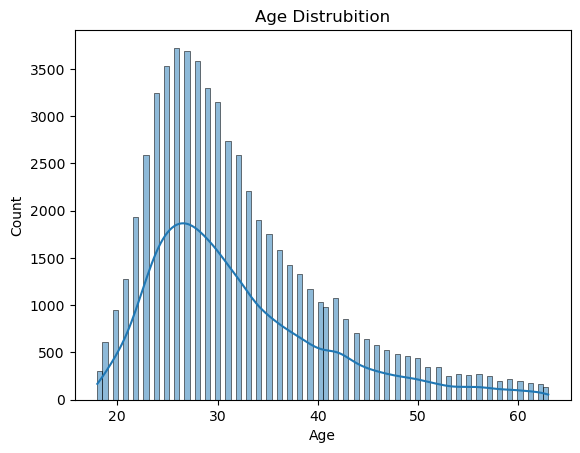

In [13]:
#Delete age values which is higher than Upper last non-outlier value is  60.69862688488308
df_upper_std = 63
df = df[df['age'] <= df_upper_std]
sns.histplot(data=df, x = 'age', kde = True)
plt.title('Age Distrubition')
plt.xlabel('Age')
print(df.age.mean())
print(df.age.median())

In [14]:
#Change diets column
diet_categories = {
    'anything': ['strictly anything', 'mostly anything', 'anything'],
    'vegetarian': ['strictly vegetarian', 'mostly vegetarian', 'vegetarian'],
    'vegan': ['strictly vegan', 'mostly vegan', 'vegan'],
    'halal': ['strictly halal', 'mostly halal', 'halal'],
    'kosher': ['strictly kosher', 'mostly kosher', 'kosher'],
    'other': ['strictly other', 'mostly other', 'other']
}

def categorize_diet(diet):
    for category, values in diet_categories.items():
        if diet in values:
            return category
    return None

# Yeni 'diet_category' sütununu oluşturma
df['diet'] = df['diet'].apply(categorize_diet)

df.diet.value_counts()

anything      27679
vegetarian     4924
other          1770
vegan           695
kosher          115
halal            77
Name: diet, dtype: int64

In [15]:
def categorize_education(education):
    if pd.isna(education):
        return None
    
    if "graduated from" in education or "working on" in education:
        program = education.split("graduated from ")[-1].split("working on ")[-1]
        return program
    
    if "dropped out of" in education:
        program = education.split("dropped out of ")[-1]
        if program.startswith("college/university") or program.startswith("space camp") or program.startswith("two-year college"):
            return "high school"
        elif "high school" in program:
            return "no education"
        elif "masters program" in program:
            return "college/university"
        elif "ph.d program" in program:
            return "college/university"
        elif "law school" in program:
            return "high school"
        elif "med school" in program:
            return "high school"

    if education.startswith("college/university") or education.startswith("space camp") or education.startswith("two-year college") or education.startswith("ph.d program") or education.startswith("high school") or education.startswith("law school") or education.startswith("med school") or education.startswith("masters program"):
        return education
    
    return None

df['last_degree'] = df['education'].apply(categorize_education)

In [16]:
#Change ethnicity column
df['ethnicity'] = df.ethnicity.str.split().str.get(0)
df['ethnicity'] = df['ethnicity'].str.replace(',', '').str.strip()
print("nnumber of categories:",df.ethnicity.nunique())
print("categories:", df.ethnicity.unique())
print(df.ethnicity.value_counts())

nnumber of categories: 9
categories: ['asian' 'white' nan 'hispanic' 'pacific' 'black' 'middle' 'native'
 'indian' 'other']
white       33077
asian        8196
hispanic     4370
black        3055
other        1691
indian       1194
middle        809
pacific       717
native        705
Name: ethnicity, dtype: int64


The IQR is 5.0
The lower outlier values starts from 58.5
The upper outlier values starts from 78.5
123
161


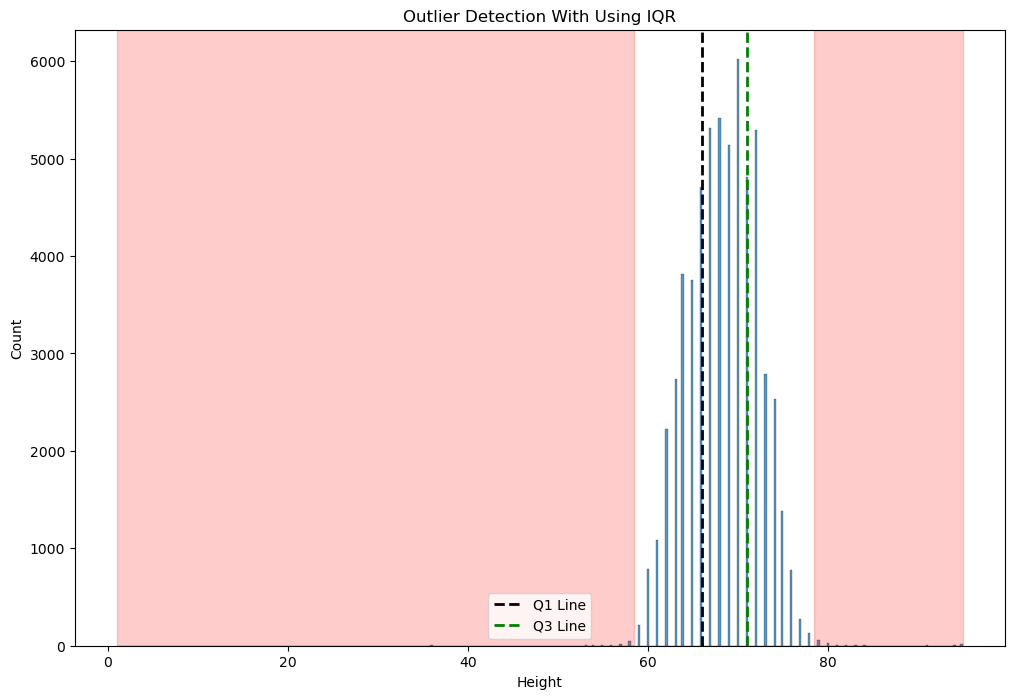

In [17]:
#Change height outliers
Q1 = df["height"].quantile(0.25)
Q3 = df["height"].quantile(0.75)

IQR = Q3 - Q1

cut_off = IQR * 1.5 #Yukaridaki aciklamada bahsettigimiz IQR * 1.5 degeri ayni zamanda cut_off degeri olarak da bahsedilebilir.

lower_outlier = Q1 - cut_off
upper_outlier = Q3 + cut_off

print('The IQR is',IQR)
print('The lower outlier values starts from', lower_outlier)
print('The upper outlier values starts from', upper_outlier)

df_lower = df[df['height'] < lower_outlier]
df_upper = df[df['height'] > upper_outlier]
print(df_lower.shape[0])
print(df_upper.shape[0])
plt.figure(figsize = (12,8))
plt.title('Outlier Detection With Using IQR')
plt.xlabel('Height')
plt.ylabel('Count')
sns.histplot(df.height, kde=False)
plt.axvline(x = Q1, color = 'black', label = 'Q1 Line',linestyle = '--',linewidth = 2)
plt.axvline(x = Q3, color = 'green', label = 'Q3 Line',linestyle = '--',linewidth = 2)
plt.legend()
plt.axvspan(xmin = lower_outlier,xmax= df.height.min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper_outlier,xmax= df.height.max(),alpha=0.2, color='red')

Lower last non-outlier value is  56.317890392745895
Upper last non-outlier value is  80.28660353574143
Total number of outliers:  130


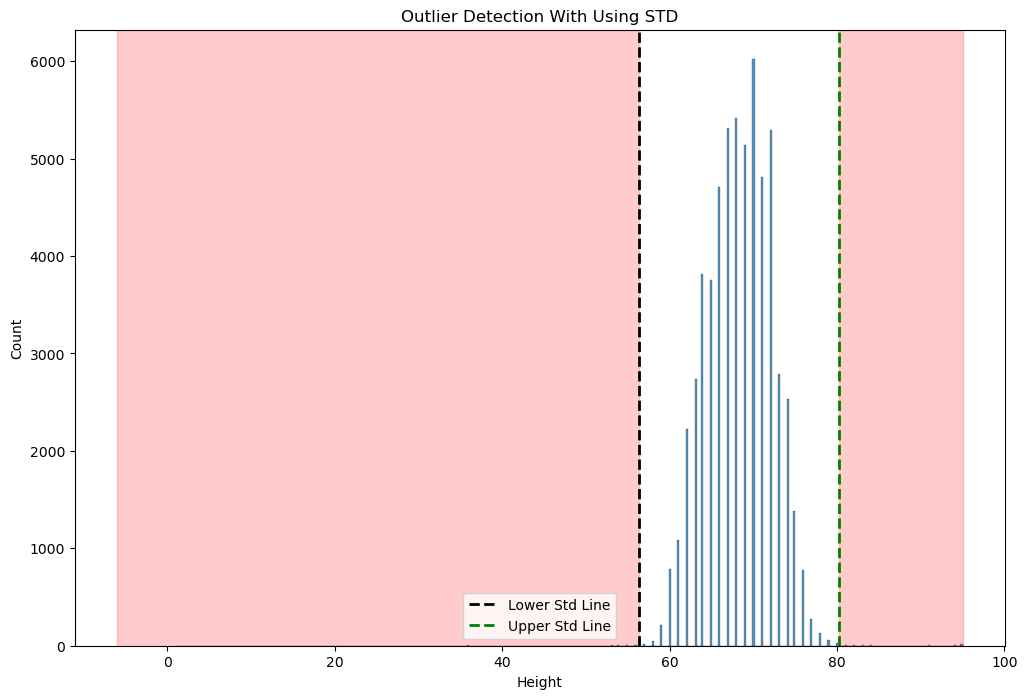

In [18]:
mean_val = df.height.mean()
std_val = df.height.std()

cutoff = std_val * 3 #third std value in other names

lower_std = mean_val - cutoff
upper_std = mean_val + cutoff

print('Lower last non-outlier value is ' , lower_std)
print('Upper last non-outlier value is ', upper_std)

df_lower_std = df[df['height'] < lower_std]
df_upper_std = df[df['height'] > upper_std]
print('Total number of outliers: ', (df_lower_std.shape[0]+df_upper_std.shape[0]))
plt.figure(figsize = (12,8))
plt.title('Outlier Detection With Using STD')
plt.xlabel('Height')
plt.ylabel('Count')
sns.histplot(df.height, kde=False)
plt.axvline(x = lower_std, color = 'black', label = 'Lower Std Line',linestyle = '--',linewidth = 2)
plt.axvline(x = upper_std, color = 'green', label = 'Upper Std Line',linestyle = '--',linewidth = 2)
plt.legend()
plt.axvspan(xmin = lower_std,xmax= df.height.min()-7,alpha=0.2, color='red')
plt.axvspan(xmin = upper_std,xmax= df.height.max(),alpha=0.2, color='red')

68.30092030744336
68.0


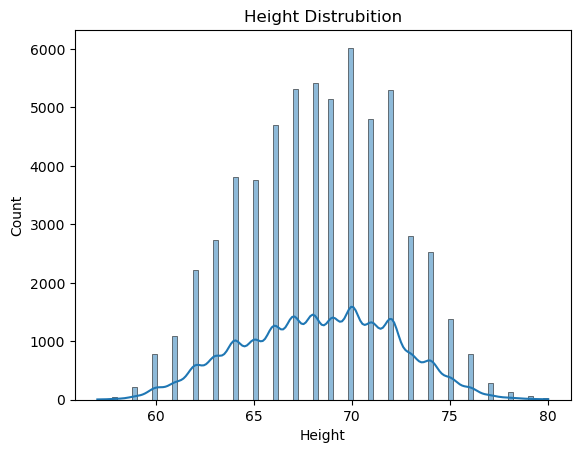

In [19]:
#Delete outlier height values
df = df[df['height'] <= upper_std]
df = df[df['height'] >= lower_std]
sns.histplot(data=df, x = 'height', kde = True)
plt.title('Height Distrubition')
plt.xlabel('Height')
print(df.height.mean())
print(df.height.median())

In [20]:
def extract_state(location):
    state = location.split(', ')[-2]
    return state

# Tüm location sütunu için extract_state fonksiyonunu uygulayın
df['states'] = df['location'].apply(extract_state)
print(df.states)
df['states'] = df['states'].apply(lambda x: x.title())
df.states

0        south san francisco
1                    oakland
2              san francisco
3                   berkeley
4              san francisco
                ...         
59941                oakland
59942          san francisco
59943    south san francisco
59944          san francisco
59945          san francisco
Name: states, Length: 59328, dtype: object


0        South San Francisco
1                    Oakland
2              San Francisco
3                   Berkeley
4              San Francisco
                ...         
59941                Oakland
59942          San Francisco
59943    South San Francisco
59944          San Francisco
59945          San Francisco
Name: states, Length: 59328, dtype: object

In [21]:
us_states.columns

Index(['Name', 'Latitude', 'Longitude'], dtype='object')

In [22]:
state_counter = df['states'].value_counts()
state_counter_df = pd.DataFrame(state_counter.reset_index())
state_counter_df = state_counter_df.rename(columns={'index': 'Name', 'states': 'count'})
merged_states = pd.merge(state_counter_df, us_states, on='Name')
merged_states

Name  count   Latitude   Longitude
0   San Francisco  30876  37.774931 -122.419417
1         Oakland   7143  37.804364 -122.271114
2        Berkeley   4140  37.871592 -122.272747
3       San Mateo   1317  37.562992 -122.325525
4       Palo Alto   1049  37.441883 -122.143019
..            ...    ...        ...         ...
75        Arcadia      1  34.139728 -118.035344
76       Pasadena      1  34.147786 -118.144517
77        Jackson      1  38.348803 -120.774103
78      Sunnyvale      1  37.368831 -122.036350
79         Orange      1  33.787794 -117.853111

[80 rows x 4 columns]

In [23]:
california_center = [36.7783, -119.4179]

# Folium haritası oluşturalım
map_california = folium.Map(location=california_center, zoom_start=6)

for i, row in merged_states.iterrows():
    folium.Circle(
        location=[row['Latitude'], row['Longitude']],
        radius=row['count'] / 5,  # Populasyona bağlı olarak yarıçapı belirleyelim
        color='blue',
        fill=True,
        fill_opacity=0.7,
        popup=row['Name'] + '<br>' + 'count: ' + str(row['count'])
    ).add_to(map_california)

# Haritayı gösterelim
map_california

In [24]:
df.pets.head()

0    likes dogs and likes cats
1    likes dogs and likes cats
2                     has cats
3                   likes cats
4    likes dogs and likes cats
Name: pets, dtype: object

In [25]:
df.dropna(subset=['pets'], inplace=True)
df['likes_cats'] = df['pets'].apply(lambda x: 1 if 'likes cats' in x or 'has cats' in x else 0)
df['likes_dogs'] = df['pets'].apply(lambda x: 1 if 'likes dogs' in x or 'has dogs' in x else 0)

In [26]:
df['religion'] = df.religion.str.split().str[0]
print("nnumber of categories:",df.religion.nunique())
print("categories:", df.religion.unique())
print(df.religion.value_counts())
print("-"*100)
df['religion'].replace({'agnosticism':'atheism', 'catholicism': 'christianity'}, inplace=True)
print(df.religion.value_counts())

nnumber of categories: 9
categories: ['agnosticism' nan 'atheism' 'christianity' 'catholicism' 'other'
 'buddhism' 'judaism' 'hinduism' 'islam']
agnosticism     6730
other           5820
atheism         5144
christianity    3959
catholicism     3373
judaism         2155
buddhism        1380
hinduism         222
islam             82
Name: religion, dtype: int64
----------------------------------------------------------------------------------------------------
atheism         11874
christianity     7332
other            5820
judaism          2155
buddhism         1380
hinduism          222
islam              82
Name: religion, dtype: int64


In [27]:
#Change sign column
df['sign'] = df.sign.str.split().str.get(0)
print("nnumber of categories:",df.sign.nunique())
print("categories:", df.sign.unique())
print(df.sign.value_counts())

nnumber of categories: 12
categories: ['gemini' 'cancer' 'pisces' 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'leo' nan 'libra' 'scorpio' 'aries' 'capricorn']
leo            3157
gemini         3066
virgo          3003
cancer         2997
taurus         2969
libra          2948
scorpio        2929
aries          2836
pisces         2813
sagittarius    2790
aquarius       2745
capricorn      2564
Name: sign, dtype: int64


In [28]:
df = df.drop(columns=['last_online','location','education','offspring'])

In [29]:
df['speaks'] = df['speaks'].astype(str)
df['bilingual'] = df['speaks'].apply(lambda x: 'bilingual' if ',' in x else 'bylengual')
df.bilingual.value_counts()

bilingual    21996
bylengual    17608
Name: bilingual, dtype: int64

In [30]:
df['drinks'] = df['drinks'].replace(['very often', 'desperately'], 'very often')
df['drinks'].value_counts()

socially      28125
rarely         4107
often          3582
not at all     2255
very often      531
Name: drinks, dtype: int64

In [31]:
def change_ages(x):
    if x in range(18,24):
        return 'Gen Z'
    elif x in range(24,31):
        return 'Early Millenials'
    elif x in range(31,40):
        return 'Millenials'
    elif x in range(40,46):
        return 'Early Gen X'
    elif x in range(46,51):
        return 'Gen X'
    else:
        return 'Baby Boomers'
    
df['age'] = df['age'].apply(change_ages)

# DATA VISUALIZATION

In [32]:
df.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'ethnicity', 'height',
       'income', 'job', 'orientation', 'pets', 'religion', 'sex', 'sign',
       'smokes', 'speaks', 'status', 'last_degree', 'states', 'likes_cats',
       'likes_dogs', 'bilingual'],
      dtype='object')

### Relationship Between SEX and Body TYPES

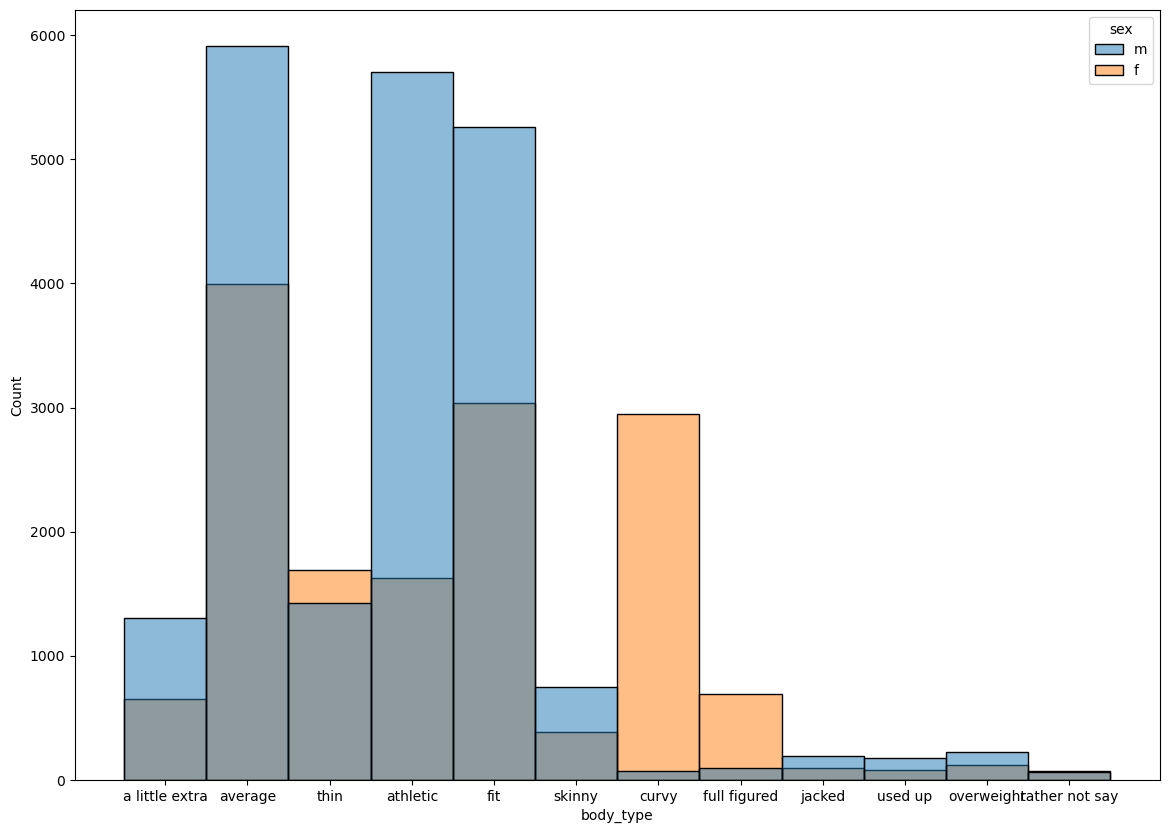

<Figure size 640x480 with 0 Axes>

In [33]:
plt.figure(figsize = (14,10))
sns.histplot(x = 'body_type', data = df, hue = 'sex')
plt.show()
plt.clf()

### Relationship Between ORIENTATION and Body TYPES

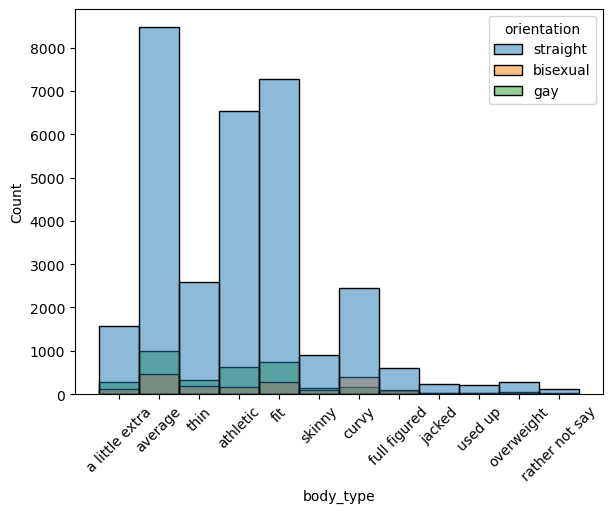

<Figure size 640x480 with 0 Axes>

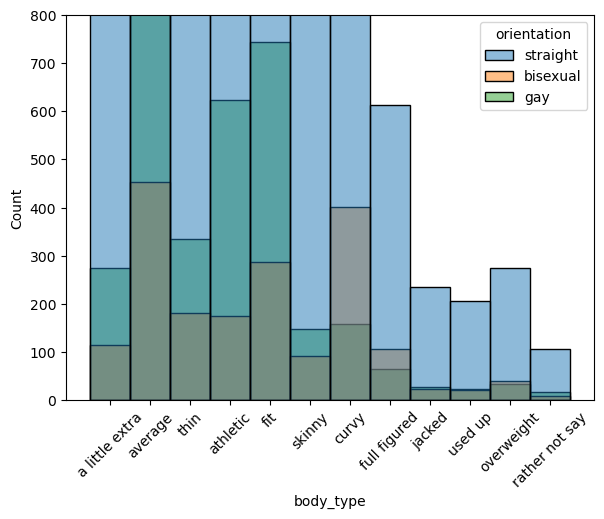

<Figure size 640x480 with 0 Axes>

In [34]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.xticks(rotation = 45)
sns.histplot(x = 'body_type', data = df, hue = 'orientation')
plt.show()
plt.clf()

plt.figure(figsize = (15,5))
plt.subplot(1,2,2)
plt.xticks(rotation = 45)
plt.ylim(0, 800)
sns.histplot(x = 'body_type', data = df, hue = 'orientation')
plt.show()
plt.clf()

### Relationship Between DIET and Body TYPES

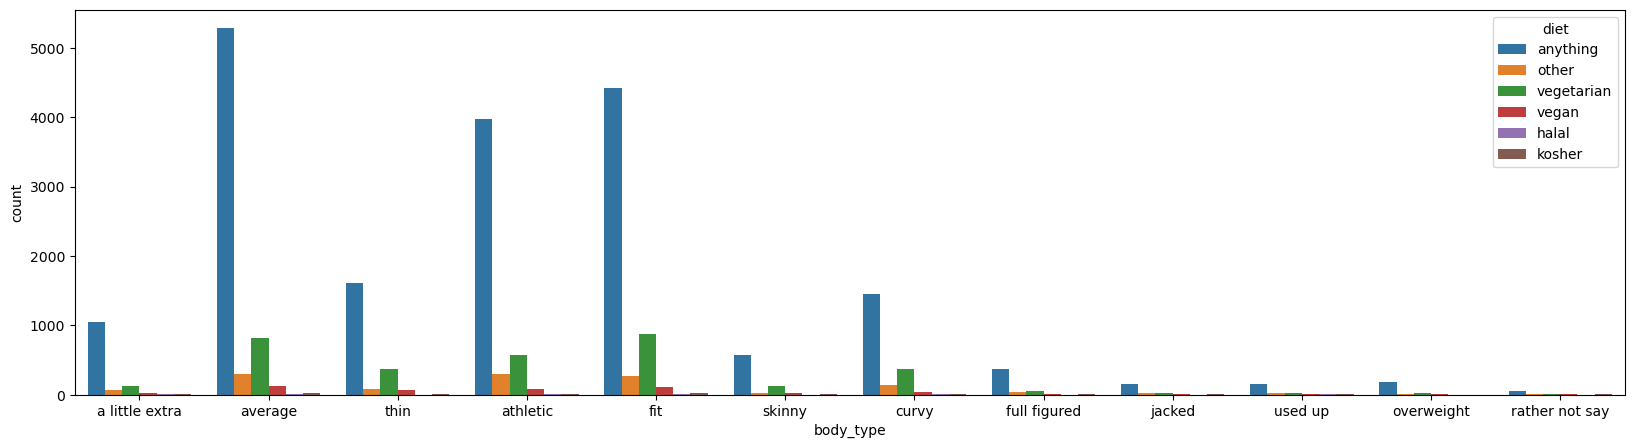

<Figure size 640x480 with 0 Axes>

In [35]:
plt.figure(figsize = (20,5))
sns.countplot(x = 'body_type', data = df,hue = 'diet')
plt.show()
plt.clf()

### Relationship Between Degree and Body Types

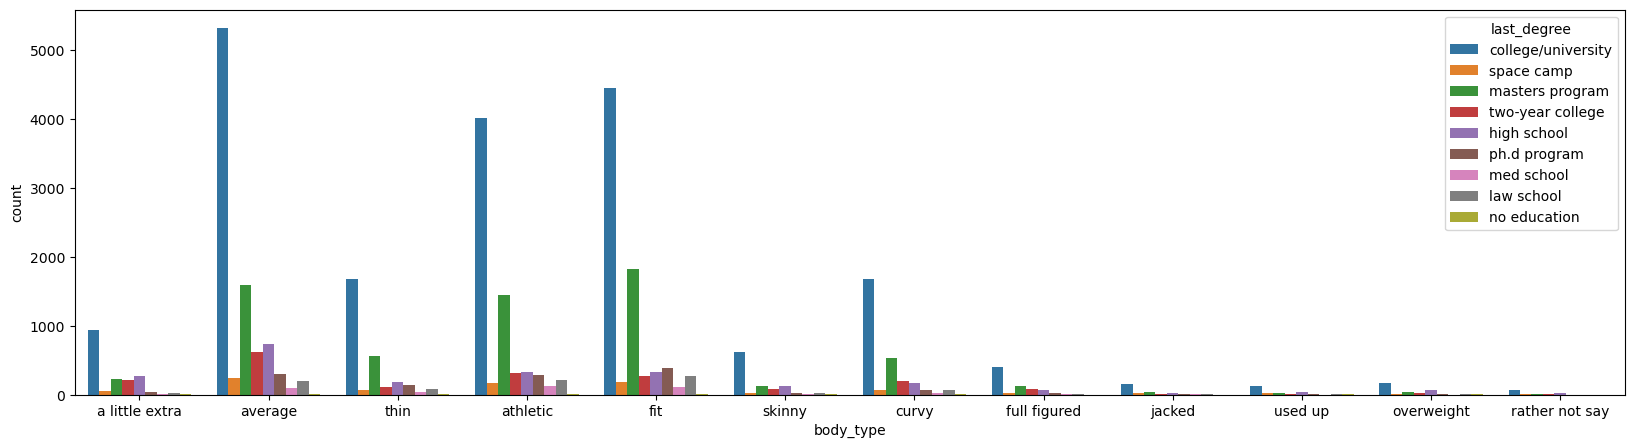

<Figure size 640x480 with 0 Axes>

In [36]:
plt.figure(figsize = (20,5))
sns.countplot(x = 'body_type', data = df,hue = 'last_degree')
plt.show()
plt.clf()

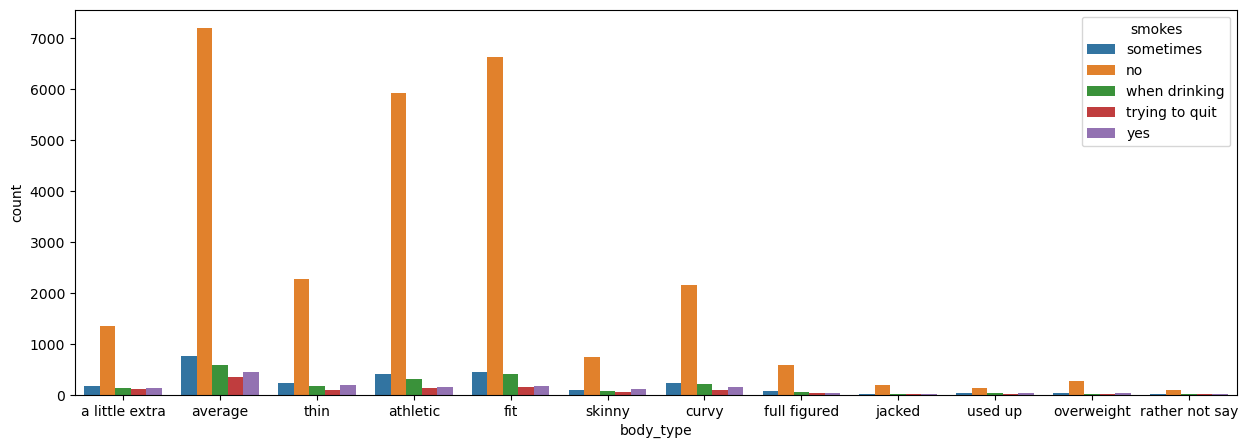

<Figure size 640x480 with 0 Axes>

In [37]:
plt.figure(figsize = (15,5))
sns.countplot(x = 'body_type', data = df,hue = 'smokes')
plt.show()
plt.clf()

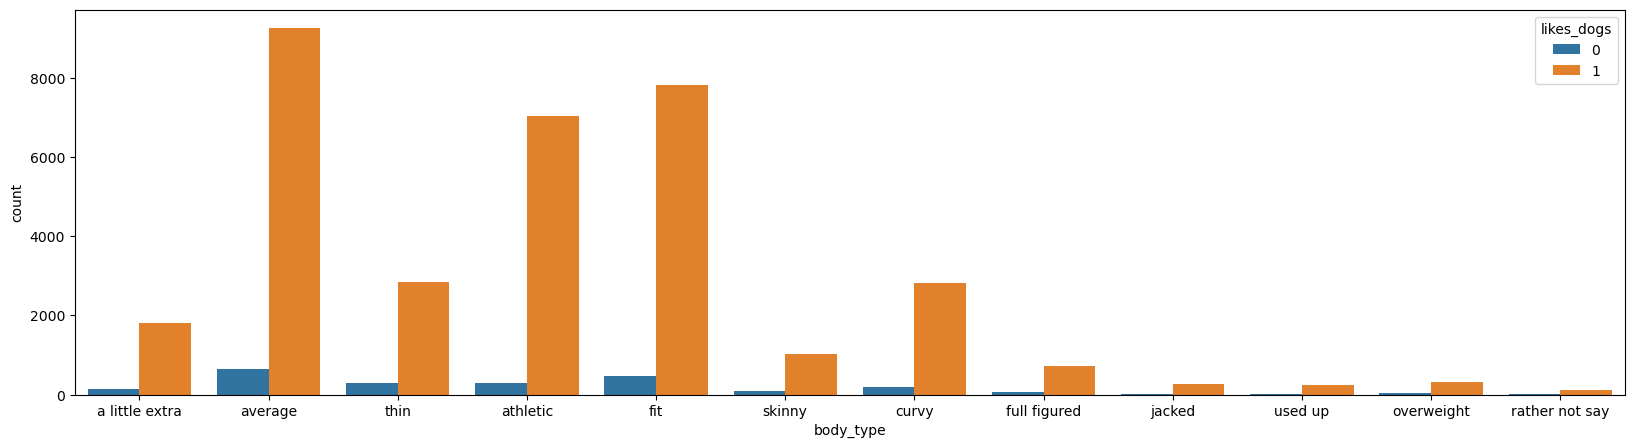

<Figure size 640x480 with 0 Axes>

In [38]:
plt.figure(figsize = (20,5))
sns.countplot(x = 'body_type', data = df,hue = 'likes_dogs')
plt.show()
plt.clf()

age
body_type
diet
drinks
drugs
ethnicity
height
income
job
orientation
pets
religion


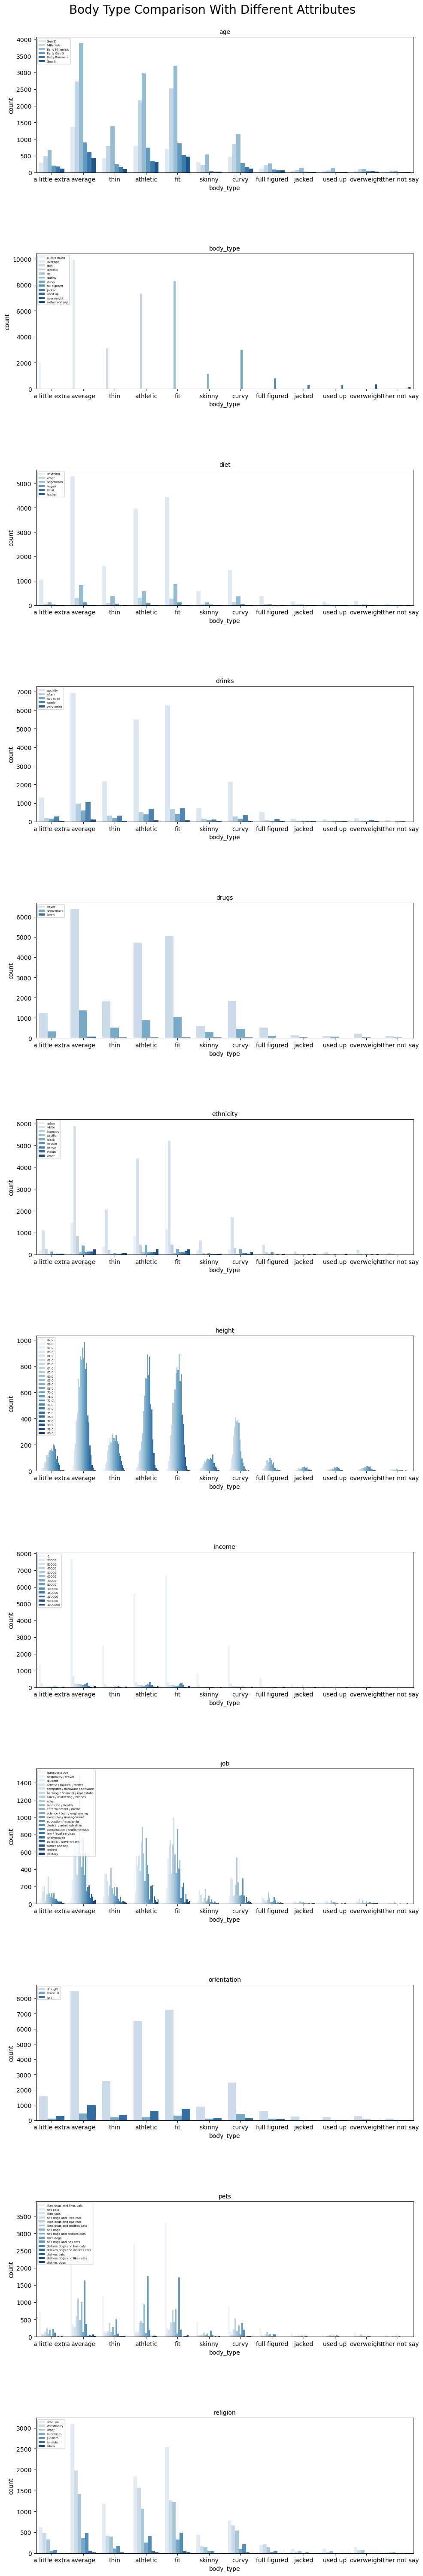

In [39]:
fig1 = plt.figure(figsize = (10,60))
for i in range(len(df.columns)-10):
    if i != "speaks":
        print(df.columns[i])
        ax = plt.subplot(12,1,i+1)
        sns.countplot(x = 'body_type', data = df,hue = df.columns[i],palette = "Blues")
        ax.set_title(df.columns[i],fontsize = 10)
        plt.legend(loc=2, fontsize = 5)
        ax.tick_params(axis='x', labelsize=10)
        ax.tick_params(axis='y', labelsize=10)


plt.suptitle("Body Type Comparison With Different Attributes",fontsize = 20, y = 1)
plt.tight_layout()
plt.subplots_adjust(hspace=0.6)

pets
religion
sex
sign
smokes
status
last_degree
likes_cats
likes_dogs
bilingual


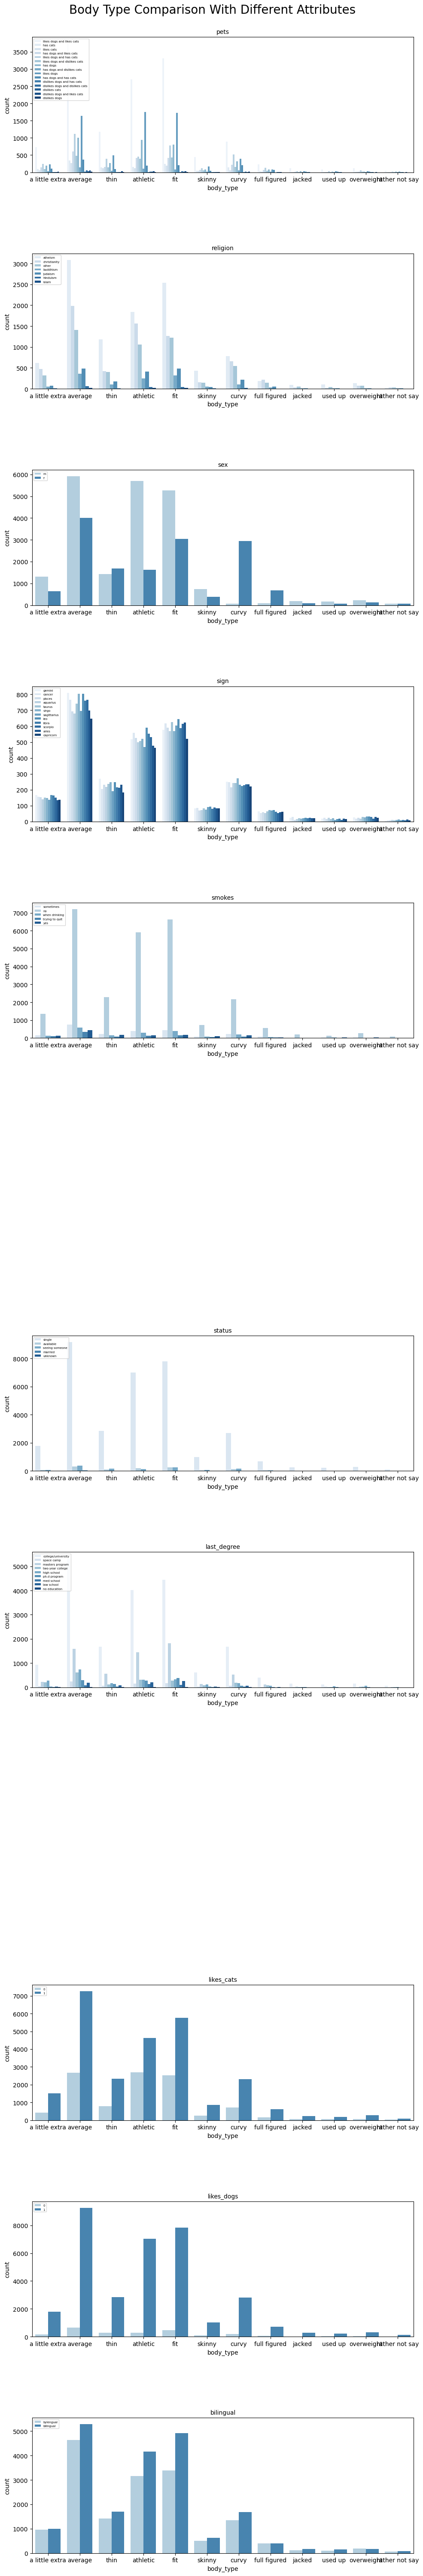

In [40]:
fig1 = plt.figure(figsize = (10,60))
for i in range(10,len(df.columns)):
    if df.columns[i] not in ["speaks","states"]:
        print(df.columns[i])
        ax = plt.subplot(12,1,i-9)
        sns.countplot(x = 'body_type', data = df,hue = df.columns[i],palette = "Blues")
        ax.set_title(df.columns[i],fontsize = 10)
        plt.legend(loc=2, fontsize = 5)
        ax.tick_params(axis='x', labelsize=10)
        ax.tick_params(axis='y', labelsize=10)


plt.suptitle("Body Type Comparison With Different Attributes",fontsize = 20, y = 1)
plt.tight_layout()
plt.subplots_adjust(hspace=0.6)

### Data Preprocessing 

In [41]:
df.drop(columns = ['pets','income','speaks'], axis=1, inplace=True)

In [42]:
df.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'ethnicity', 'height',
       'job', 'orientation', 'religion', 'sex', 'sign', 'smokes', 'status',
       'last_degree', 'states', 'likes_cats', 'likes_dogs', 'bilingual'],
      dtype='object')

In [43]:
value_counts = df['states'].value_counts()

filtered_states = value_counts[value_counts >= 50].index

df = df[df['states'].isin(filtered_states)]

In [44]:
df.reset_index()

index               age       body_type        diet    drinks  \
0          0             Gen Z  a little extra    anything  socially   
1          1        Millenials         average       other     often   
2          2        Millenials            thin    anything  socially   
3          3             Gen Z            thin  vegetarian  socially   
4          4  Early Millenials        athletic        None  socially   
...      ...               ...             ...         ...       ...   
39171  59940        Millenials             NaN        None  socially   
39172  59941      Baby Boomers             NaN        None  socially   
39173  59942  Early Millenials             fit    anything     often   
39174  59944  Early Millenials        athletic    anything  socially   
39175  59945        Millenials         average        None  socially   

           drugs ethnicity  height                          job orientation  \
0          never     asian    75.0               transportation    straight   
1      sometimes     white    70.0         hospitality / travel    straight   
2            NaN       NaN    68.0                          NaN    straight   
3            NaN     white    71.0                      student    straight   
4          never     asian    66.0  artistic / musical / writer    straight   
...          ...       ...     ...                          ...         ...   
39171      never    middle    62.0                          NaN    straight   
39172      never       NaN    62.0  sales / marketing / biz dev    straight   
39173  sometimes     white    72.0        entertainment / media    straight   
39174      often     asian    73.0            medicine / health    straight   
39175        NaN     white    68.0            medicine / health         gay   

           religion sex         sign          smokes     status  \
0           atheism   m       gemini       sometimes     single   
1           atheism   m       cancer              no     single   
2               NaN   m       pisces              no  available   
3               NaN   m       pisces              no     single   
4               NaN   m     aquarius              no     single   
...             ...  ..          ...             ...        ...   
39171       atheism   f  sagittarius              no     single   
39172  christianity   f       cancer              no     single   
39173       atheism   m          leo              no     single   
39174       atheism   m          leo  trying to quit     single   
39175  christianity   m       gemini       sometimes     single   

              last_degree               states  likes_cats  likes_dogs  \
0      college/university  South San Francisco           1           1   
1              space camp              Oakland           1           1   
2         masters program        San Francisco           1           0   
3      college/university             Berkeley           1           0   
4      college/university        San Francisco           1           1   
...                   ...                  ...         ...         ...   
39171     masters program        San Francisco           0           1   
39172  college/university              Oakland           0           1   
39173  college/university        San Francisco           1           1   
39174  college/university        San Francisco           1           1   
39175     masters program        San Francisco           1           1   

       bilingual  
0      bylengual  
1      bilingual  
2      bilingual  
3      bilingual  
4      bylengual  
...          ...  
39171  bilingual  
39172  bylengual  
39173  bylengual  
39174  bilingual  
39175  bylengual  

[39176 rows x 20 columns]

In [45]:
df.dropna(inplace = True)
df.isna().sum()

age            0
body_type      0
diet           0
drinks         0
drugs          0
ethnicity      0
height         0
job            0
orientation    0
religion       0
sex            0
sign           0
smokes         0
status         0
last_degree    0
states         0
likes_cats     0
likes_dogs     0
bilingual      0
dtype: int64

In [46]:
le = LabelEncoder()

for i in df.columns:
    print(i)
    if df[i].dtype == object:
        le.fit(df[i].drop_duplicates())
        df[i] = le.transform(df[i])

age
body_type
diet
drinks
drugs
ethnicity
height
job
orientation
religion
sex
sign
smokes
status
last_degree
states
likes_cats
likes_dogs
bilingual


In [47]:
for i in df.columns:
        print(i,df[i].dtype)

age int32
body_type int32
diet int32
drinks int32
drugs int32
ethnicity int32
height float64
job int32
orientation int32
religion int32
sex int32
sign int32
smokes int32
status int32
last_degree int32
states int32
likes_cats int64
likes_dogs int64
bilingual int32


<Axes: title={'center': 'Correlation Map With Categorical Values'}>

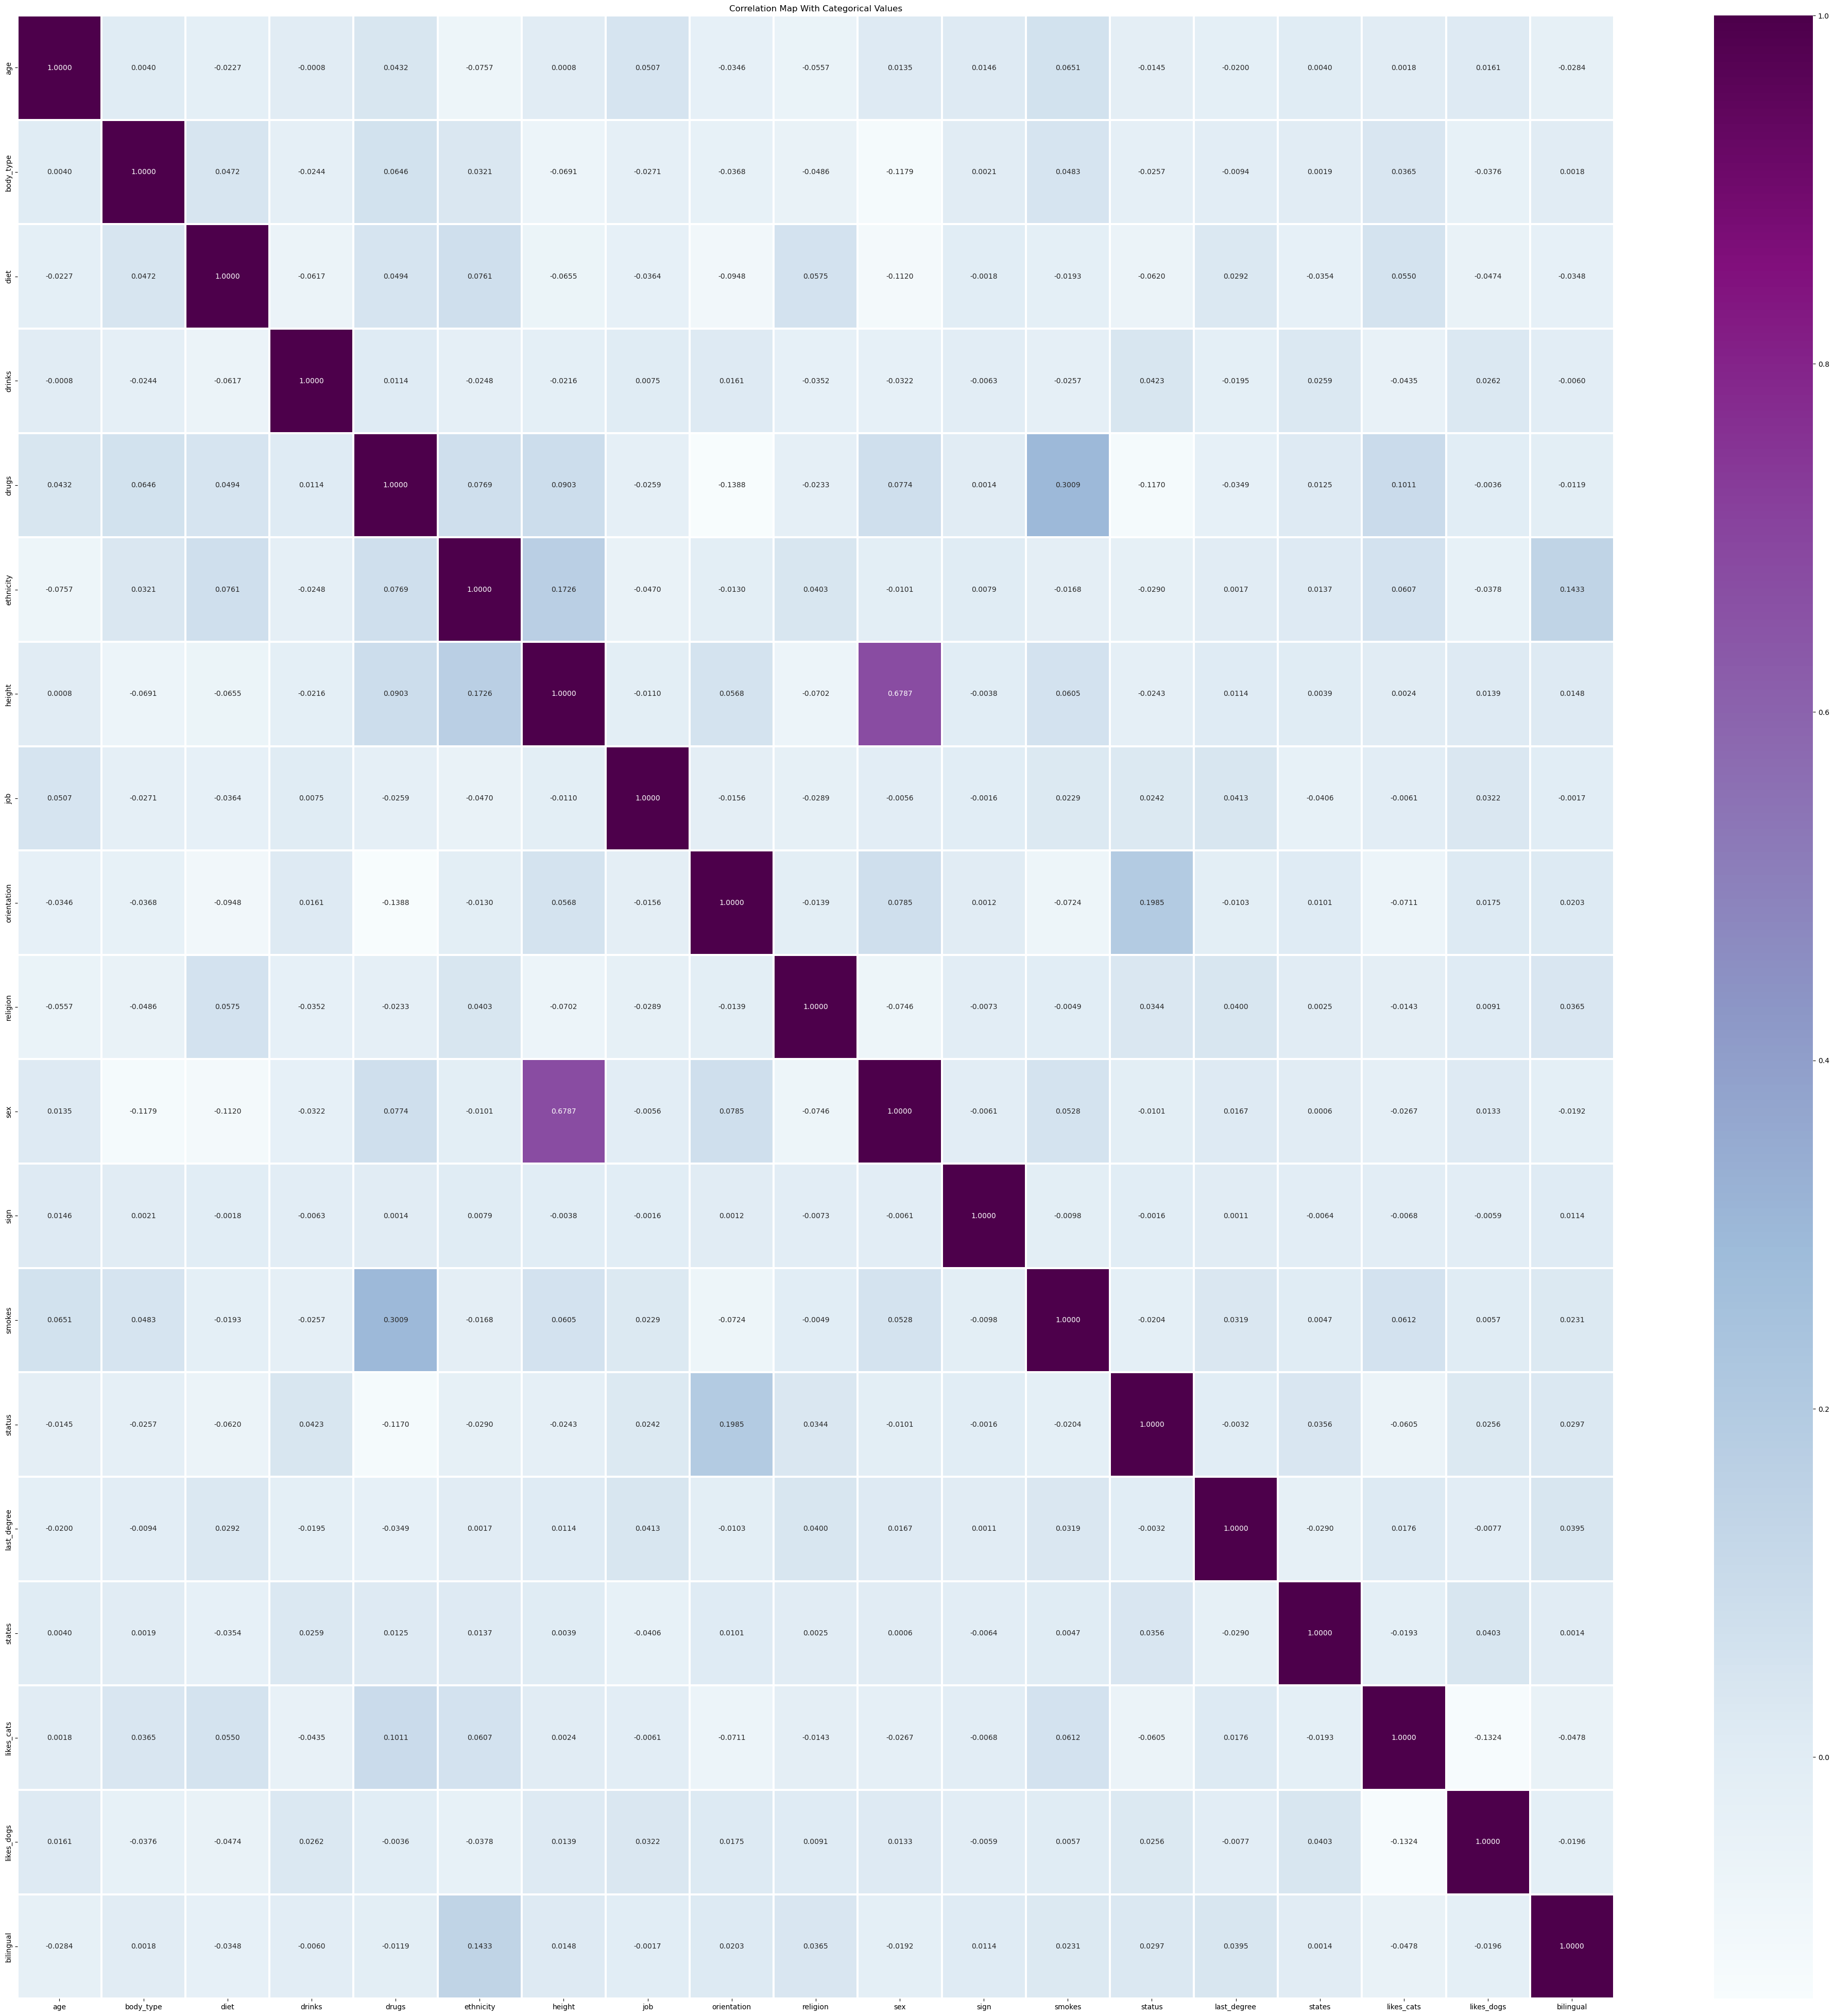

In [48]:
plt.figure(figsize = (50,50))
plt.title('Correlation Map With Categorical Values')
sns.heatmap(df.corr(), annot= True,fmt='.4f', linewidths=1.5,cmap="BuPu")

In [50]:
#X = df.drop(['drinks', 'drugs', 'age', 'height', 'ethnicity', 'smokes', 'status', 'last_degree', 'states', 'bilingual','sign'], axis = 1)
#X = df.drop(['sign','','','','','','','',],axis = 1)
X = df.drop(['sex'],axis = 1)
y = df['sex']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 30)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import plotly.express as px
import numpy as np

In [52]:
model = GridSearchCV(estimator=LogisticRegression(),param_grid={'C': list(range(1, 11))})
pipe_lr = Pipeline([('scaler', StandardScaler()), ('LogisticRegression', model)])
pipe_lr.fit(X, y)
print("The best score is: {}".format(pipe_lr['LogisticRegression'].best_score_))
print("The best parameters are: {}".format(pipe_lr['LogisticRegression'].best_params_))
fig = px.scatter(pd.DataFrame(pipe_lr['LogisticRegression'].cv_results_), x='param_C', y='mean_test_score', title = 'Different values of C')
fig.data[0].update(mode='markers+lines')
fig.show()

The best score is: 0.8429678971794173
The best parameters are: {'C': 1}


In [53]:
model = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid={'max_depth': list(range(3, 100))})
pipe_dt = Pipeline([('scaler', StandardScaler()), ('DecisionTreeClassifier', model)])
pipe_dt.fit(X, y)
print(pipe_dt['DecisionTreeClassifier'].best_score_)
print(pipe_dt['DecisionTreeClassifier'].best_params_)
fig = px.scatter(pd.DataFrame(pipe_dt['DecisionTreeClassifier'].cv_results_), x='param_max_depth', y='mean_test_score', title = 'Different tree depths')
fig.data[0].update(mode='markers+lines')
fig.show()

0.8509099000493139
{'max_depth': 6}


In [54]:
model = GridSearchCV(estimator=RandomForestClassifier(),param_grid={'max_depth': list(range(6, 40)), 'n_estimators': [150, 180, 300]})
pipe_rf = Pipeline([('scaler', StandardScaler()), ('rfc', model)])
pipe_rf.fit(X, y)
print(pipe_rf['rfc'].best_score_)
print(pipe_rf['rfc'].best_params_)
fig = px.scatter_3d(pd.DataFrame(pipe_rf['rfc'].cv_results_),
                    x='param_max_depth',
                    y = 'param_n_estimators',
                    z='mean_test_score',
                    color = 'mean_test_score',
                    color_continuous_scale = 'Viridis',
                    title = 'Different Random Forest Parameters')
fig.show()

0.8691829105211191
{'max_depth': 33, 'n_estimators': 150}


In [55]:
lr = LogisticRegression()
pipe_lr = Pipeline([('scaler', StandardScaler()), ('LogisticRegression', lr)])
dtree = DecisionTreeClassifier(max_depth = 6)
pipe_dt = Pipeline([('scaler', StandardScaler()), ('DecisionTreeClassifier', dtree)])
rfor = RandomForestClassifier(max_depth = 26, n_estimators = 300)
pipe_rf = Pipeline([('scaler', StandardScaler()), ('RandomForestClassifier', rfor)])

trained_pipe_lr = pipe_lr.fit(X_train, y_train)
trained_pipe_dt = pipe_dt.fit(X_train, y_train)
trained_pipe_rf = pipe_rf.fit(X_train, y_train)

In [56]:
lr_predictions = trained_pipe_lr.predict(X_test)
dt_predictions = trained_pipe_dt.predict(X_test)
rf_predictions = trained_pipe_rf.predict(X_test)

model_accuracy_dict = {}
model_list = [trained_pipe_lr, trained_pipe_dt, trained_pipe_rf]
model_names = ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier']
for model, name in zip(model_list, model_names):
    test_score = model.score(X_test, y_test)
    model_accuracy_dict[name] = test_score

In [57]:
accuracy_df = pd.DataFrame(model_accuracy_dict, index = ["Accuracy"])
fig = px.bar(accuracy_df.transpose(), y=model_names, x = "Accuracy", orientation = 'h')
fig.update_yaxes(categoryorder = "total ascending")
fig.update_traces(texttemplate='%{value:.3f}', textposition = 'outside')
fig.update_layout(title="Accuracy of Different Models", yaxis_title="Model",)
fig.show()
fig.write_html("modelaccuracy.html")

In [58]:
predictor_legend = ['Male Predictor', 'Female Predictor']
fig = px.bar(
        y=X.columns,
        x=abs(trained_pipe_lr['LogisticRegression'].coef_[0]), 
        color=[predictor_legend[0] if c > 0 else predictor_legend[1] for c in trained_pipe_lr['LogisticRegression'].coef_[0]],
        color_discrete_sequence=['red', 'blue'],
        labels=dict(x='Predictor', y='Weight/Importance'),
        title='Top 20 Predictors of the Logistic Regression Model',
    )
fig.update_yaxes(categoryorder = "total ascending", range=(len(X.columns) - 20.6, len(X.columns)))
fig.show()
fig.write_html("lrpreds.html")

fig = px.bar(
        y=X.columns,
        x=trained_pipe_dt['DecisionTreeClassifier'].feature_importances_, 
        labels=dict(x='Predictor', y='Weight/Importance'),
        title='Top 20 Predictors of the Decision Tree Model',
    )
fig.update_yaxes(categoryorder = "total ascending", range=(len(X.columns) - 20.6, len(X.columns)))
fig.show()
fig.write_html("dtpreds.html")

fig = px.bar(
        y=X.columns,
        x=trained_pipe_rf['RandomForestClassifier'].feature_importances_, 
        labels=dict(x='Predictor', y='Weight/Importance'),
        title='Top 20 Predictors of the Random Forest Model',
    )
fig.update_yaxes(categoryorder = "total ascending", range=(len(X.columns) - 20.6, len(X.columns)))
fig.show()
fig.write_html("rfpreds.html")